In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

In [3]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
df.tail()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa
397,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,usa


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(398, 9)

In [7]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [8]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
df['mpg'].nunique()

129

In [13]:
max_mpg = df[df['mpg'] == df['mpg'].max()]
max_mpg

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan


In [14]:
min_mpg = df[df['mpg'] == df['mpg'].min()]
min_mpg

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
28,hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,usa


In [15]:
top_10_mpg =  df.groupby('name')['mpg'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_mpg

,name,mpg,count
0,chevrolet impala,14.0,2
1,ford maverick,21.0,2
2,plymouth fury iii,14.0,2
3,datsun pl510,27.0,2
4,ford galaxie 500,14.0,2
5,amc hornet,18.0,2
6,pontiac catalina,14.0,2
7,oldsmobile cutlass supreme,17.0,1
8,opel 1900,28.0,1
9,opel 1900,25.0,1


In [16]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [17]:
df['cylinders'].nunique()

5

In [18]:
cylinders = df['cylinders'].value_counts().reset_index()
cylinders

,cylinders,count
0,4,204
1,8,103
2,6,84
3,3,4
4,5,3


In [19]:
df['displacement'].nunique()

82

In [20]:
max_displacement = df[df['displacement'] == df['displacement'].max()]
max_displacement

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
13,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,usa
95,buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,usa


In [21]:
min_displacement = df[df['displacement'] == df['displacement'].min()]
min_displacement

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
117,fiat 128,29.0,4,68.0,49.0,1867,19.5,73,europe


In [22]:
top_10_displacements = df.groupby('name')['displacement'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_displacements

,name,displacement,count
0,chevrolet nova,250.0,3
1,chevrolet chevette,98.0,3
2,plymouth duster,198.0,3
3,amc gremlin,232.0,3
4,toyota corolla,108.0,3
5,amc hornet,232.0,3
6,chevrolet vega,140.0,3
7,ford maverick,200.0,3
8,chevrolet caprice classic,305.0,2
9,plymouth valiant,225.0,2


In [23]:
df['horsepower'].nunique()

94

In [24]:
max_horsepower = df[df['horsepower'] == df['horsepower'].max()]
max_horsepower

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
116,pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,usa


In [25]:
min_horsepower = df[df['horsepower'] == df['horsepower'].min()]
min_horsepower

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,europe
102,volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,europe


In [26]:
top_10_horsepower = df.groupby('name')['horsepower'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_horsepower

,name,horsepower,count
0,toyota corolla,75.0,4
1,plymouth duster,95.0,3
2,amc gremlin,100.0,3
3,toyota corolla 1200,65.0,2
4,chevrolet impala,165.0,2
5,ford galaxie 500,153.0,2
6,buick century,110.0,2
7,toyota corona,95.0,2
8,subaru dl,67.0,2
9,chevrolet nova,105.0,2


In [27]:
df['weight'].nunique()

351

In [28]:
max_weight = df[df['weight'] == df['weight'].max()]
max_weight

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
44,pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,usa


In [29]:
min_weight = df[df['weight'] == df['weight'].min()]
min_weight

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
54,datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,japan


In [30]:
top_10_weights = df.groupby('name')['weight'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_weights

,name,weight,count
0,datsun pl510,2130,2
1,amc ambassador brougham,3821,1
2,opel manta,2158,1
3,opel 1900,2123,1
4,oldsmobile vista cruiser,4499,1
5,oldsmobile starfire sx,2855,1
6,oldsmobile omega brougham,2700,1
7,oldsmobile omega,3664,1
8,oldsmobile delta 88 royale,4456,1
9,oldsmobile cutlass supreme,4060,1


In [31]:
df['acceleration'].nunique()

95

In [32]:
max_acceleration = df[df['acceleration'] == df['acceleration'].max()]
max_acceleration

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
299,peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,europe


In [33]:
min_acceleration = df[df['acceleration'] == df['acceleration'].min()]
min_acceleration

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
11,plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,usa


In [34]:
top_10_accelerations = df.groupby('name')['acceleration'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_accelerations

,name,acceleration,count
0,chevrolet impala,12.0,2
1,datsun pl510,14.5,2
2,dodge aspen,18.7,2
3,amc gremlin,15.0,2
4,datsun 210,19.2,2
5,chevrolet vega,19.5,2
6,amc hornet,16.0,2
7,honda civic,15.0,2
8,ford gran torino (sw),16.0,2
9,opel 1900,14.0,1


In [35]:
df['origin'].nunique()

3

In [36]:
origins = df['origin'].value_counts().reset_index()
origins

,origin,count
0,usa,249
1,japan,79
2,europe,70


In [37]:
df['model_year'].nunique()

13

In [38]:
years = df['model_year'].value_counts().reset_index()
years

,model_year,count
0,73,40
1,78,36
2,76,34
3,82,31
4,75,30
5,70,29
6,79,29
7,80,29
8,81,29
9,71,28


Text(0.5, 1.0, 'Cylinders')

<Figure size 2000x500 with 0 Axes>

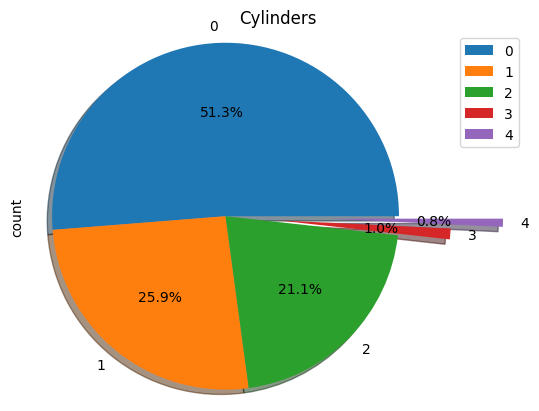

In [39]:
plt.figure(figsize=(20,5))
cylinders.plot.pie(y='count',shadow=True, autopct='%1.1f%%',explode=[0,0,0,0.3,0.6])
plt.axis('equal')
plt.title('Cylinders')

Text(0, 0.5, 'MPG')

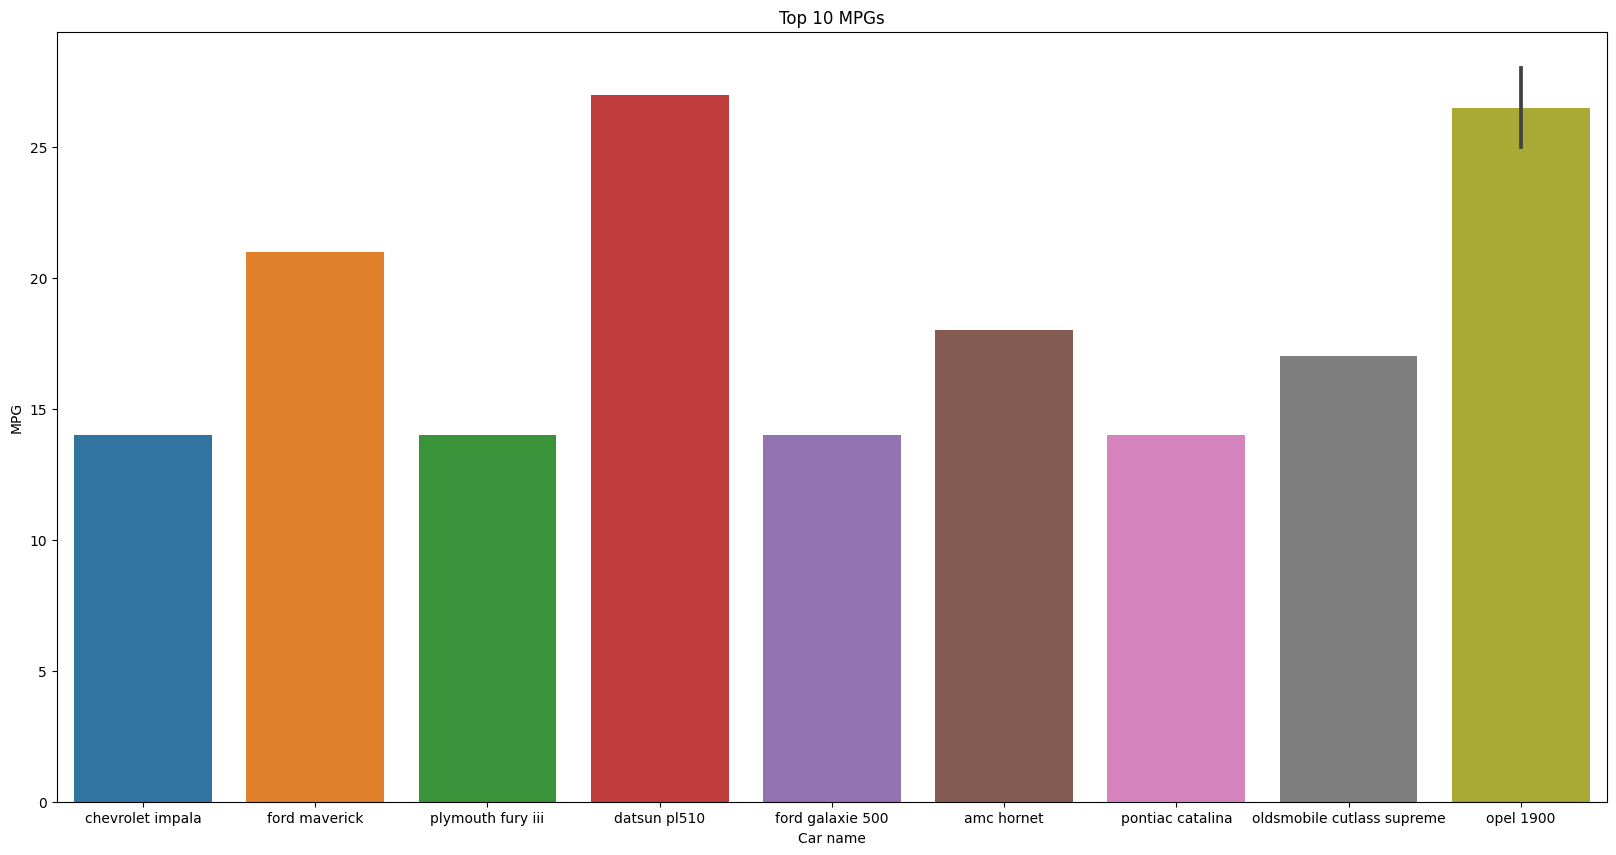

In [40]:
plt.figure(figsize=(20,10))
plt.title('Top 10 MPGs')
sns.barplot(x='name',y='mpg',data=top_10_mpg)
plt.xlabel('Car name')
plt.ylabel('MPG')

Text(0, 0.5, 'displacement')

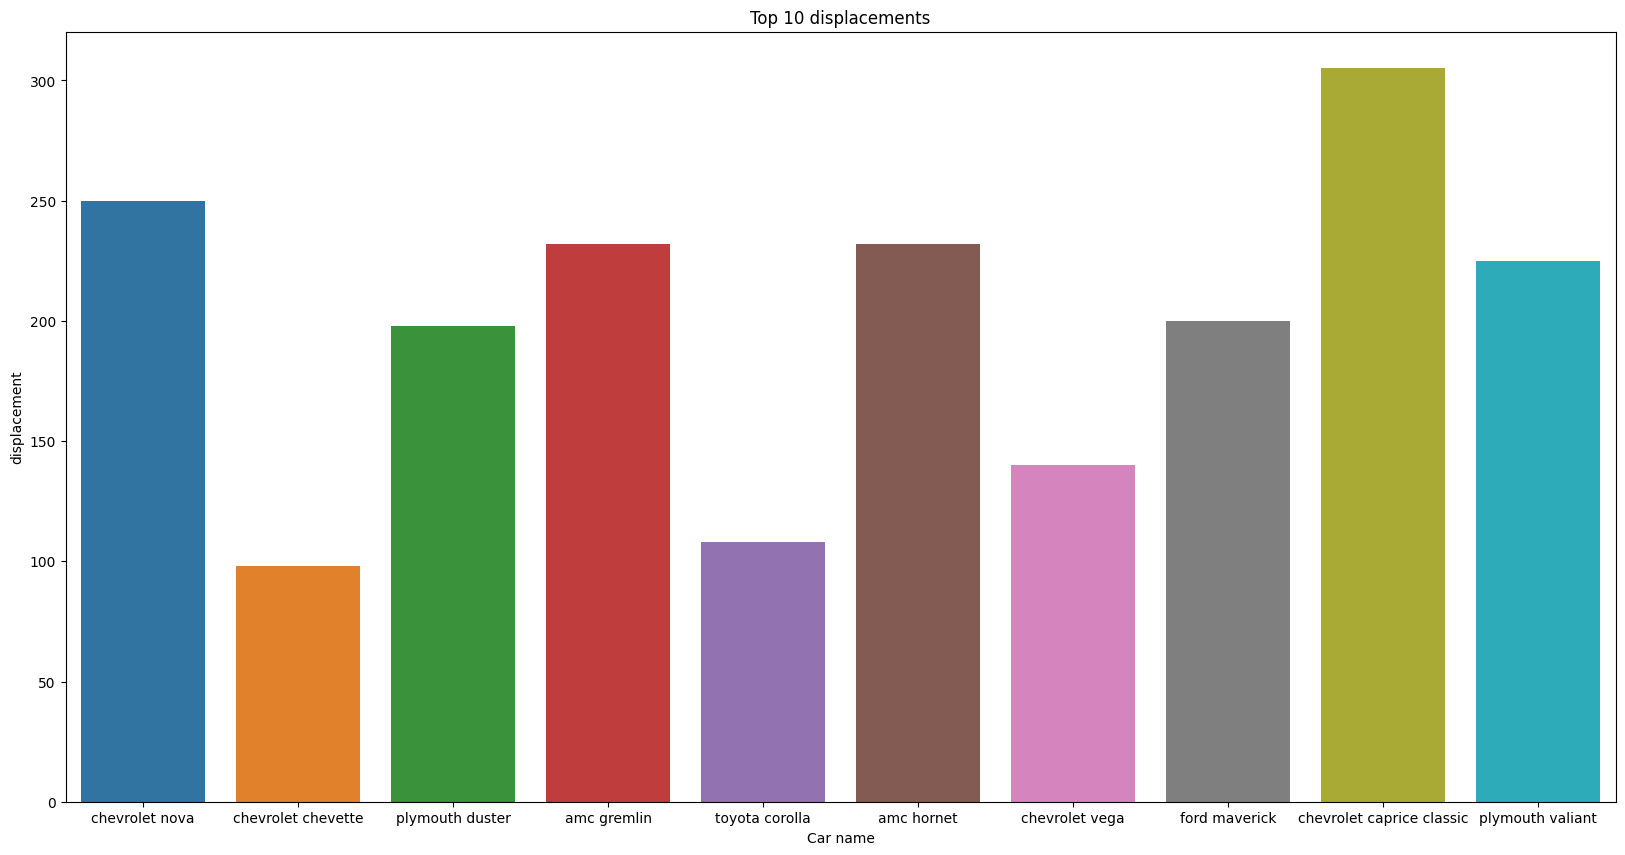

In [41]:
plt.figure(figsize=(20,10))
plt.title('Top 10 displacements')
sns.barplot(x='name',y='displacement',data=top_10_displacements)
plt.xlabel('Car name')
plt.ylabel('displacement')

Text(0, 0.5, 'Horsepower')

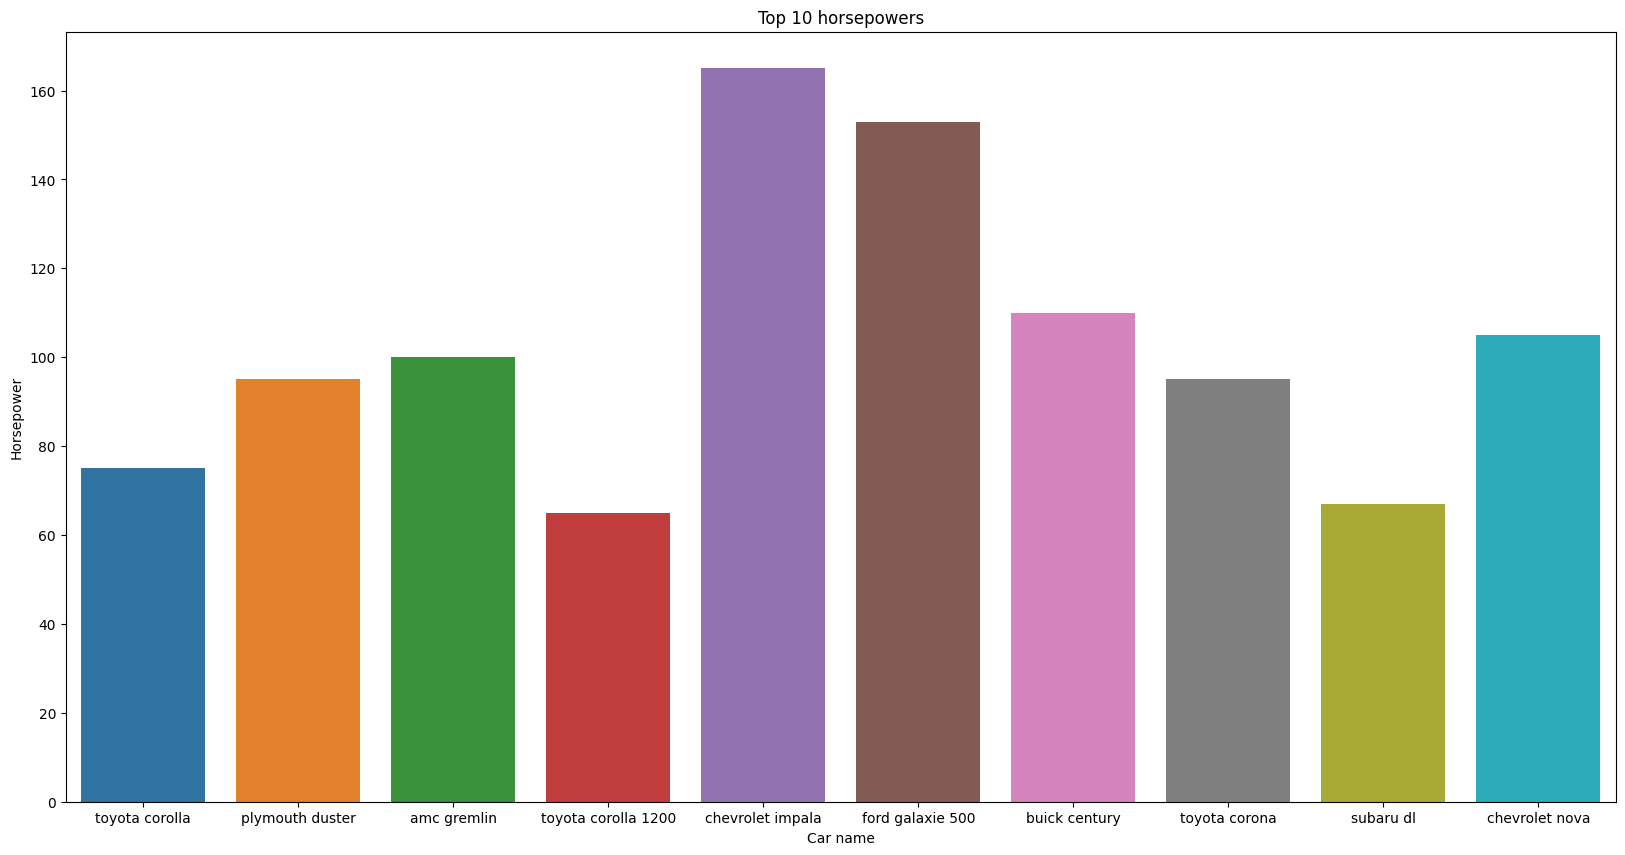

In [42]:
plt.figure(figsize=(20,10))
plt.title('Top 10 horsepowers')
sns.barplot(x='name',y='horsepower',data=top_10_horsepower)
plt.xlabel('Car name')
plt.ylabel('Horsepower')

Text(0, 0.5, 'Weight')

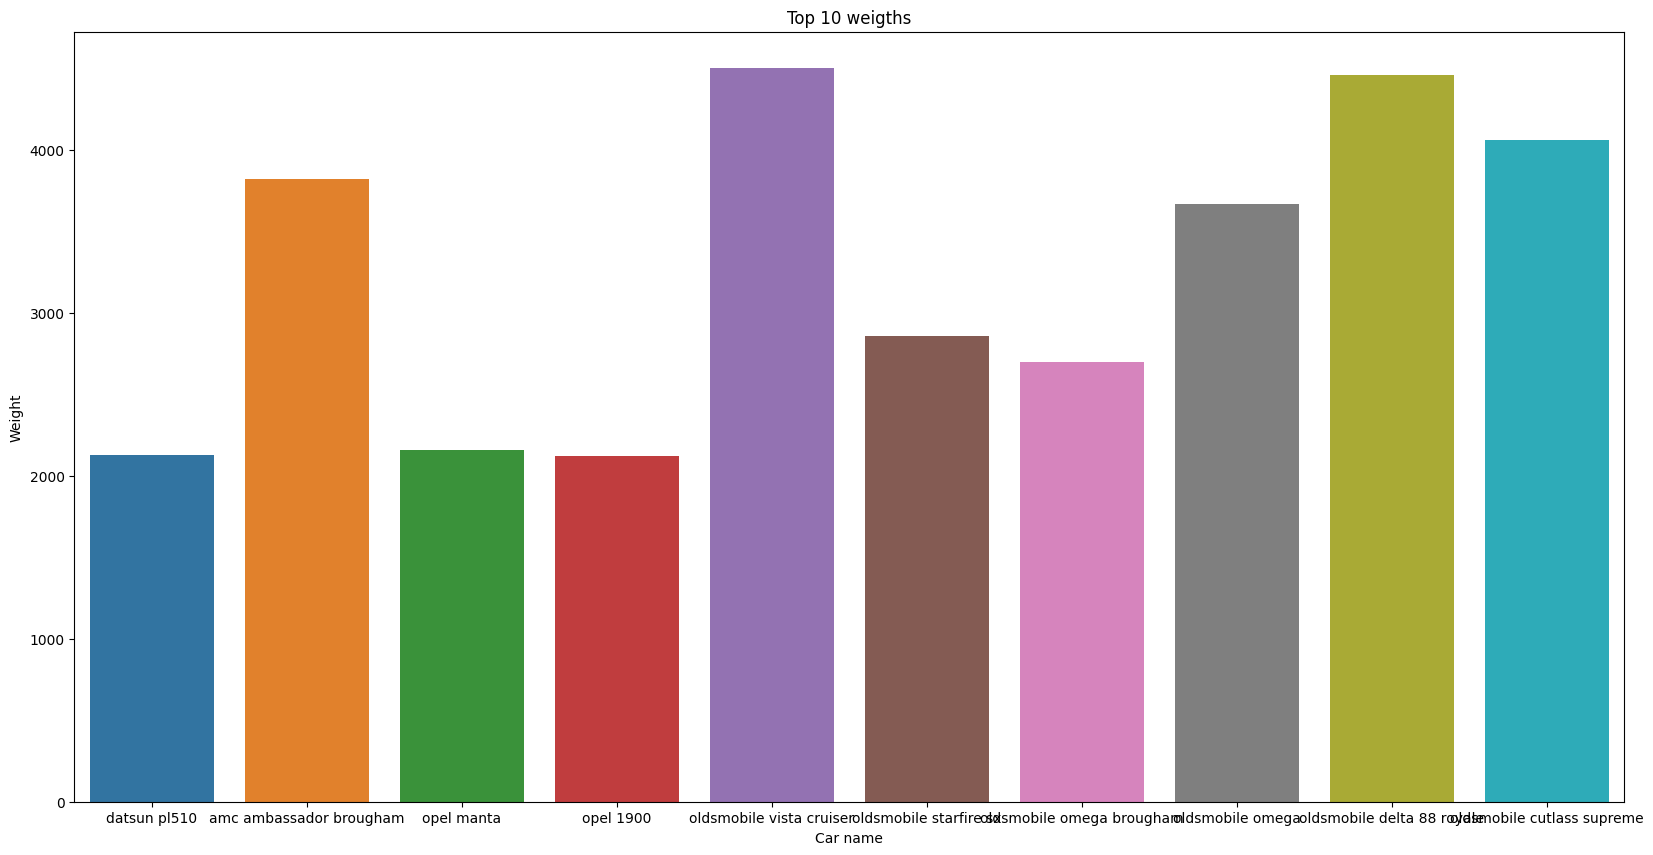

In [43]:
plt.figure(figsize=(20,10))
plt.title('Top 10 weigths')
sns.barplot(x='name',y='weight',data=top_10_weights)
plt.xlabel('Car name')
plt.ylabel('Weight')

Text(0, 0.5, 'Acceleration')

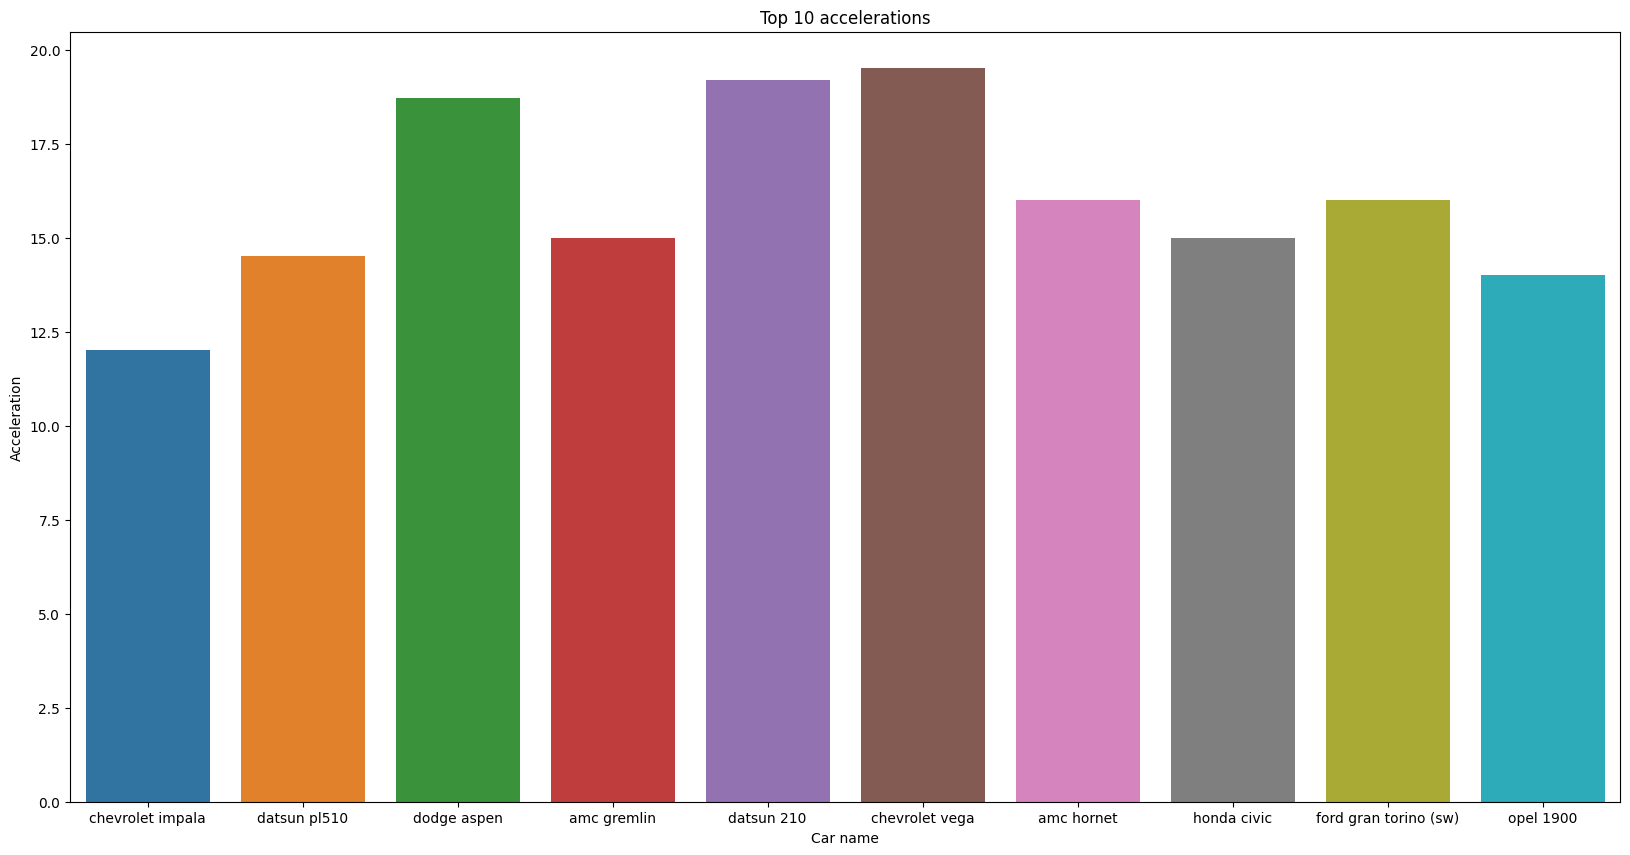

In [44]:
plt.figure(figsize=(20,10))
plt.title('Top 10 accelerations')
sns.barplot(x='name',y='acceleration',data=top_10_accelerations)
plt.xlabel('Car name')
plt.ylabel('Acceleration')

Text(0, 0.5, 'Count')

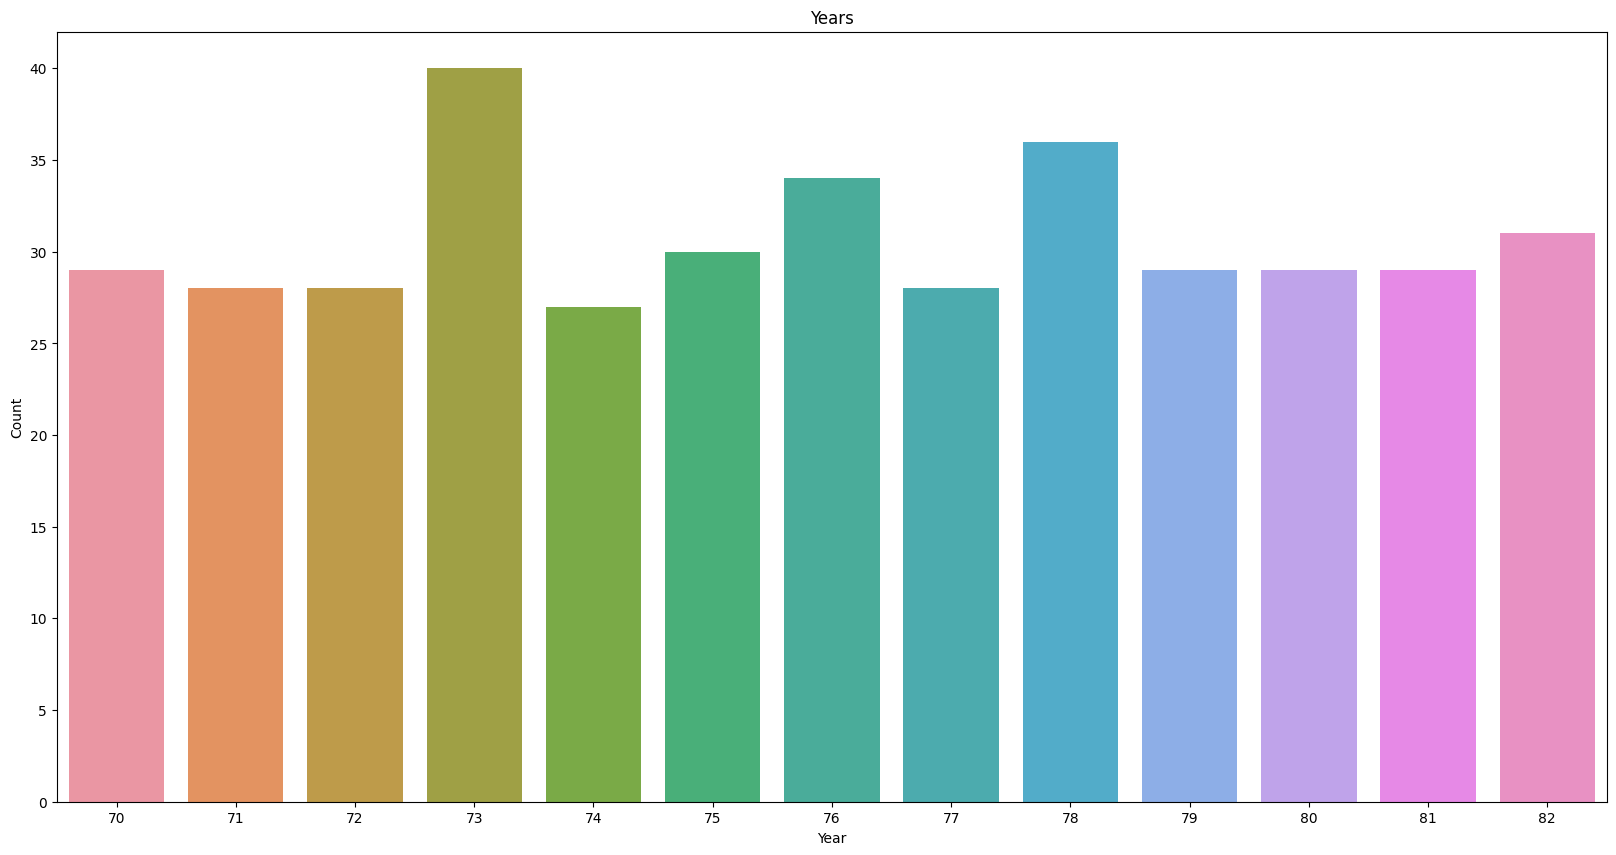

In [45]:
plt.figure(figsize=(20,10))
plt.title('Years')
sns.barplot(x='model_year',y='count',data=years)
plt.xlabel('Year')
plt.ylabel('Count')

Text(0.5, 1.0, 'Origin')

<Figure size 2000x500 with 0 Axes>

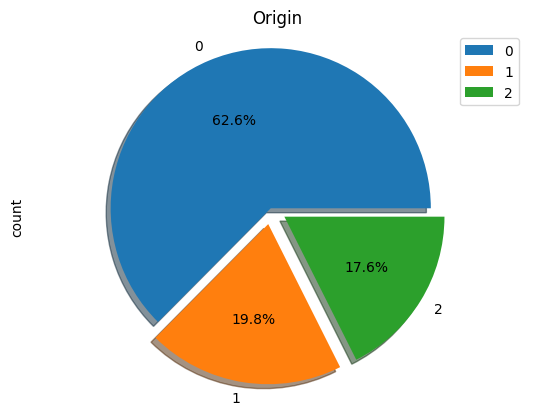

In [46]:
plt.figure(figsize=(20,5))
origins.plot.pie(y='count',shadow=True, autopct='%1.1f%%',explode=[0,0.1,0.1])
plt.axis('equal')
plt.title('Origin')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


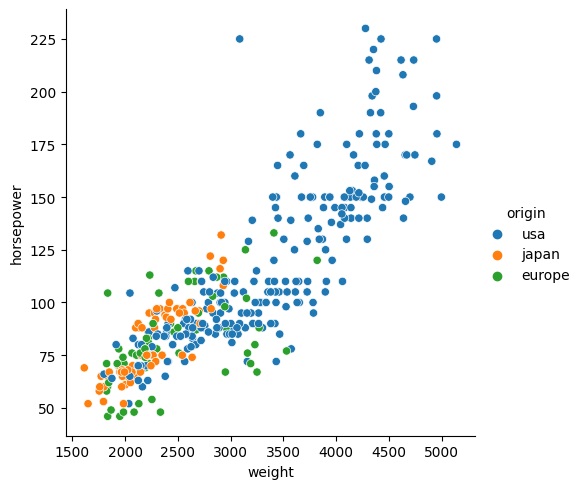

In [47]:
sns.relplot(data=df, x='weight', y='horsepower', hue='origin')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


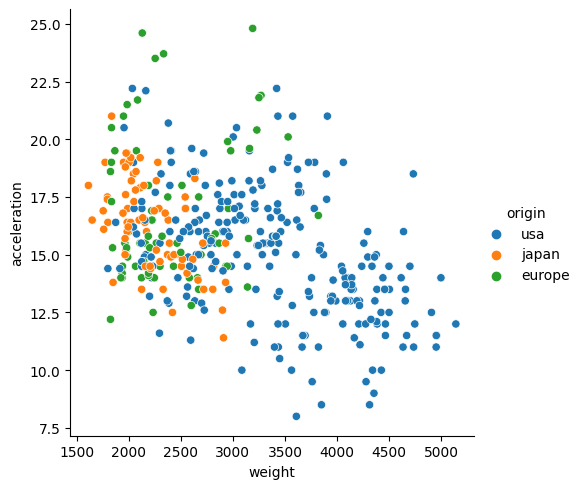

In [48]:
sns.relplot(data=df, x='weight', y='acceleration', hue='origin')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


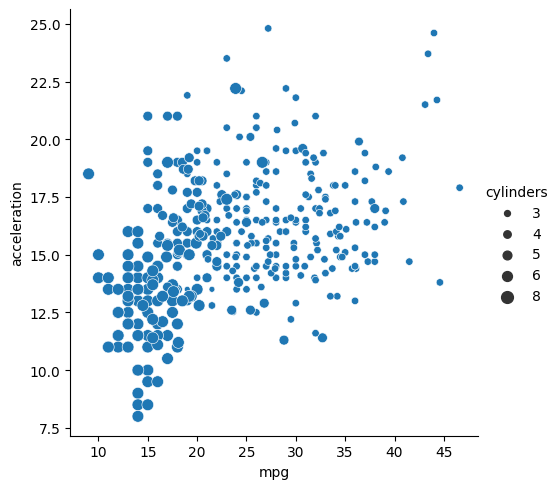

In [49]:
sns.relplot(data=df, x='mpg', y='acceleration', size='cylinders')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


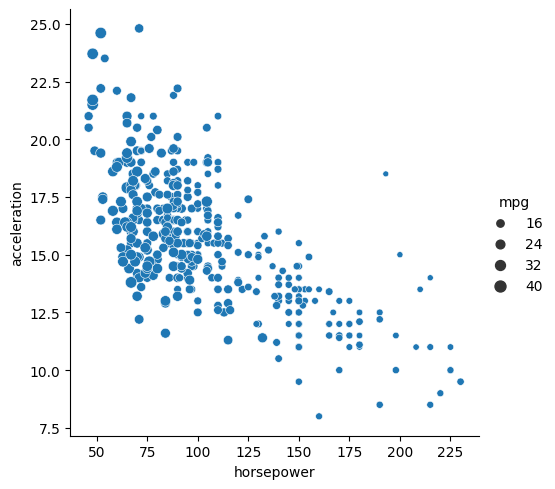

In [50]:
sns.relplot(data=df, x='horsepower', y='acceleration', size='mpg')